##### Goal: 
1.Classify survivability based on the various factors of the passengers.
#####  
2. Visualizing the Titanic Data
#####  
3. Read the dataset into a dataframe.
#####  
4. Determine what is the target variable.

### THE TARGET VARIABLE IS SURVIVED 

5. Determine and remove the variable(s) that are not likely to be relevant for logistic regression. (You will only need the following variables: Survived, Pclass, Sex, Age.)
#####  
6. Make sure there are no missing values.
##### 
7. Plot the histograms of all of the variables in a 2x2 figure.
##### 
8. Convert all categorical feature variables into dummy variables.
##### 
9. Fit the training data to a logistic regression model.
##### 
10. Using the test data, calculate the accuracy of yourpredictions for the target variable.
##### 
11. Plot the confusion matrix along with the labels (Yes, No). Include in the title of this plot the accuracy number you calculated from the step above.
##### 
12. Display the predicted value of the survivability of a 30 year old male passenger traveling in 3rd class.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



3. IMPORT DATASET

In [3]:
#IMPORT DATA INTO A PANDAS DATAFRAME.
dataset = pd.read_csv("titanic.csv")

#GETTING SHAPE OF THE DATA.
rows, columns = dataset.shape
print("Rows: {} Columns: {}".format(rows,columns))

#DESCRIBING VARIOUS DATATYPES OF THE VALUES
dataset.info()


Rows: 1310 Columns: 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [4]:
#VIEW THE FIRST FIVE DATAVALUES.
dataset.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
#GET DESCRIPTIVE STATS ON THE DATASET
#ALSO DETERMINE UNIQUE VALUES.
dataset.describe(include='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


FROM THE ABOVE WE HAVE SOME MISSING VALUES IN THE DATASET.
##
THEY WILL BE DROPPED.

In [6]:
#DETERMINE UNIQUE VALUES AND THE VARIOUS
# CATEGORIES WITHIN THE DATASET.
dataset.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [7]:
#ING A RANDOM SAMPLE TO CONFIRM THE ABOVE RESULTS
dataset.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
275,1.0,1.0,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1.0,1.0,16966,134.5000,E34,C,3,NaN,"Tuxedo Park, NY"
938,3.0,0.0,"Klasen, Mr. Klas Albin",male,18.0,1.0,1.0,350404,7.8542,NaN,S,NaN,NaN,NaN
270,1.0,1.0,"Smith, Mrs. Lucien Philip (Mary Eloise Hughes)",female,18.0,1.0,0.0,13695,60.0000,C31,S,6,NaN,"Huntington, WV"
949,3.0,1.0,"Lang, Mr. Fang",male,26.0,0.0,0.0,1601,56.4958,NaN,S,14,NaN,NaN
917,3.0,1.0,"Karun, Mr. Franz",male,39.0,0.0,1.0,349256,13.4167,NaN,C,15,NaN,NaN


2. CARRYING OUT VISUALIZATION


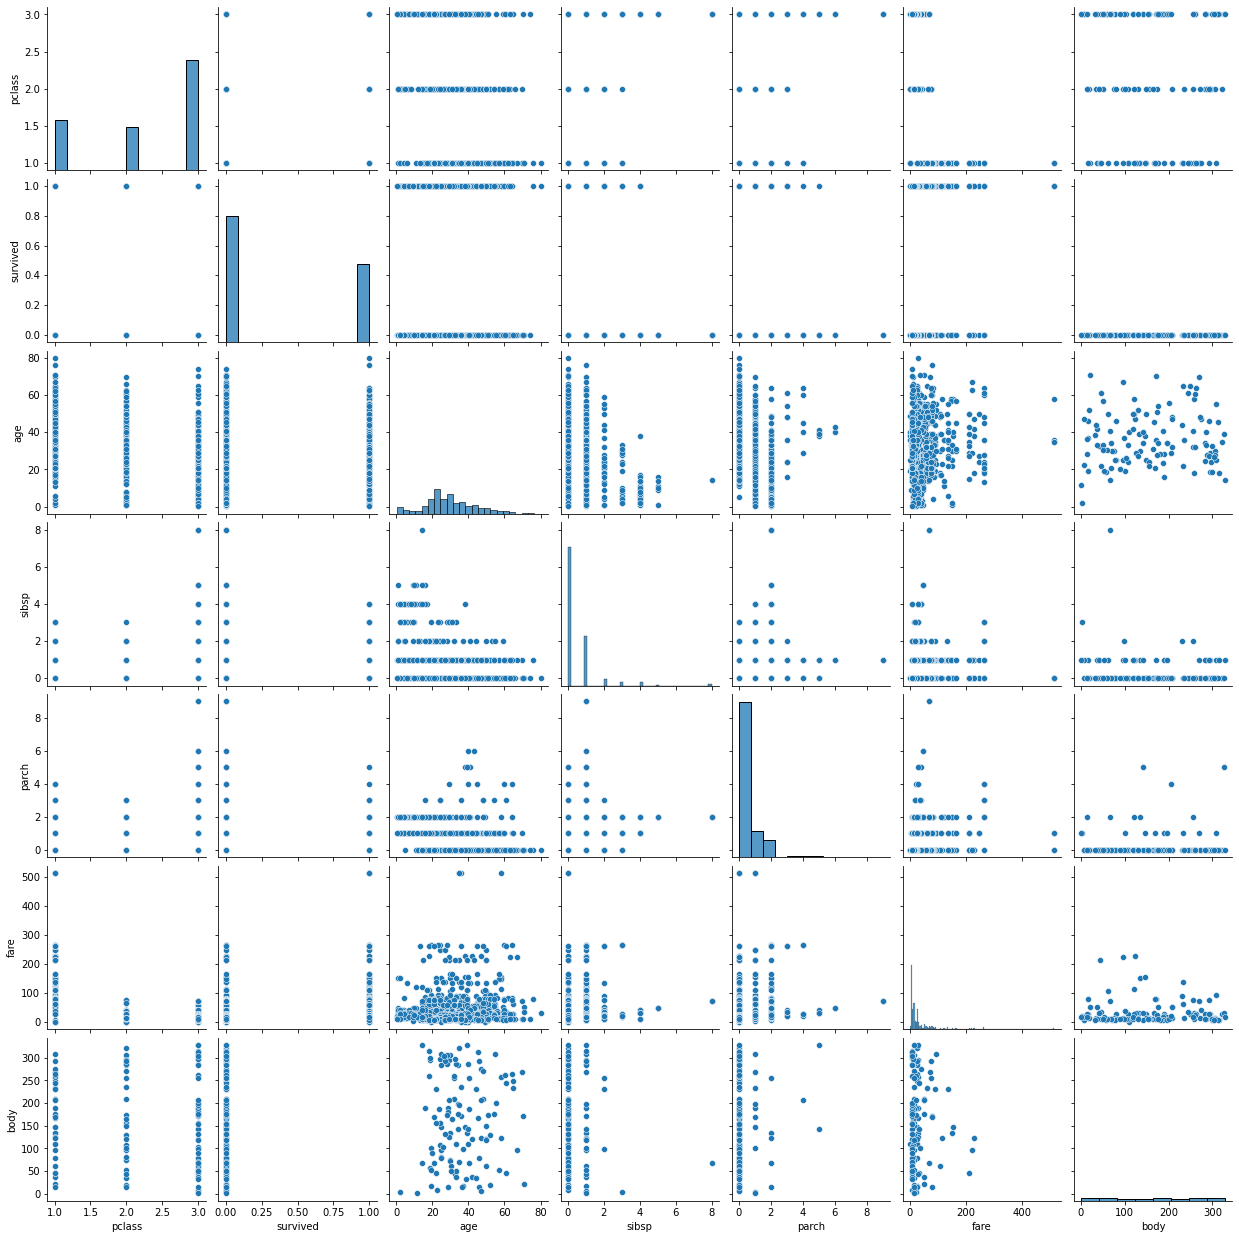

In [8]:
#VISUALIZATION FOR THE ENTIRE DATASET.
sns.pairplot(dataset)

<AxesSubplot:title={'center':'Gender'}>

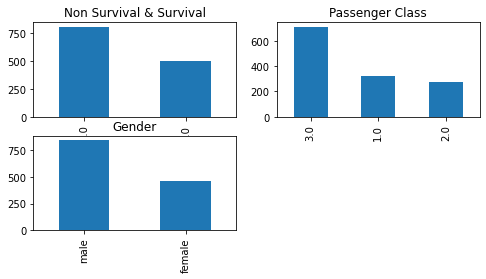

In [9]:
#B. BAR GRAPHS FOR THE VARIOUS VARIABLES.

fig = plt.figure(figsize=(8,8)) 
dim = (4, 2)
#SURVIVAL AND NON SURVIVAL NUMBER
plt.subplot2grid(dim, (0, 0))
dataset.survived.value_counts().plot(kind='bar', title='Non Survival & Survival')

# PLOTTING PASSENGER CLASS
plt.subplot2grid(dim, (0, 1))
dataset.pclass.value_counts().plot(kind='bar', title='Passenger Class')

# PLOTTING GENDER
plt.subplot2grid(dim, (1, 0))
dataset.sex.value_counts().plot(kind='bar', title='Gender')


5. REMOVING IRRELEVANT VARIABLES.

In [10]:
# RELEVANT: (You will only need the following variables: Survived, Pclass, Sex, Age.
# IRRELEVANT: THE REST.

df= dataset.loc[:, ["pclass", "sex","age","survived"]]
df.head()

,pclass,sex,age,survived
0,1.0,female,29.0000,1.0
1,1.0,male,0.9167,1.0
2,1.0,female,2.0000,0.0
3,1.0,male,30.0000,0.0
4,1.0,female,25.0000,0.0


6. WORKING ON MISSING VALUES AND VARIOUS CONVERSIONS.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   sex       1309 non-null   object 
 2   age       1046 non-null   float64
 3   survived  1309 non-null   float64
dtypes: float64(3), object(1)
memory usage: 41.1+ KB


<AxesSubplot:xlabel='age', ylabel='Density'>

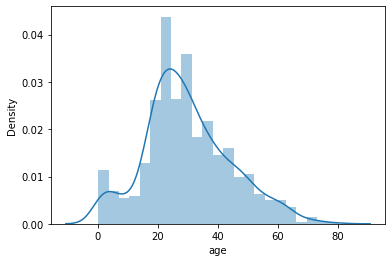

In [11]:
df.info()
#AGE SEEMS TO BE MISSING 264 VARIOUS VALUES.
#PLOTTING TO DETERMINE THE DISTRIBUTION
sns.distplot(df.age)

In [12]:
#PRINTING THE MEDIAN AGE
# PLANNING TO USE MEDIAN AGE TO FILL MISSING VALUES
# ALSO USING DESCRIBE TO GET DETAILS OF MEAN

print(df.age.median())
df.age.describe()

#TAKEAWAYS
# MEAN CLOSE TO 30 ALMOST SAME AS MEDIAN
# EITHER OF THE STRATEGY WILL DO 
# I CHOOSE TO FILL MISSING VALUES WITH MEDIAN

28.0


count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [13]:
#CATEGORISING VARIOUS VARIABLES
#ALSO CHANGING AGE TO BE DISCRETE

df.pclass = df['pclass'].astype('category')
df.sex = df['sex'].astype('category')
df.survived = df['survived'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   category
 1   sex       1309 non-null   category
 2   age       1046 non-null   float64 
 3   survived  1309 non-null   category
dtypes: category(3), float64(1)
memory usage: 14.6 KB


In [14]:
#ROUNDING THE AGE VALUES TO THE NEAREST INTEGER.
df.age = df['age'].round(0)
df.sample(5)

,pclass,sex,age,survived
146,1.0,female,49.0,1.0
494,2.0,female,24.0,1.0
265,1.0,male,28.0,1.0
1004,3.0,female,NaN,1.0
697,3.0,female,30.0,0.0


In [15]:
#NEED TO IDENTIFY IF WE HAVE MISSING VALUES
#PCLASS 
# INDEX 1309 HAS A MISSING VALUE FOR BOTH SEX, PCLASS, SURVIVED.

df.pclass[df.pclass.isna()]
df.survived[df.survived.isna()]


1309   NaN
Name: survived, dtype: category
Categories (2, float64): [0.0, 1.0]

In [16]:
#FILL THE MISSING VALUES WITH FORWARD FILL
#EXCEPT ON AGE WHICH WILL BE FILLED WITH MEAN

df.sex = df.sex.fillna(method='ffill',inplace=False)
df.pclass = df.pclass.fillna(method='ffill',inplace=False)
df.survived = df.survived.fillna(method='ffill',inplace=False)
df.tail()


,pclass,sex,age,survived
1305,3.0,female,NaN,0.0
1306,3.0,male,26.0,0.0
1307,3.0,male,27.0,0.0
1308,3.0,male,29.0,0.0
1309,3.0,male,NaN,0.0


THE THREE VARIABLES ARE NOW NOT NULL

In [17]:
len(df.age)

1310

In [18]:
#USING MEAN TO FILL MISSING VALUES FOR AGE.
df.age = df.age.fillna(28)


In [19]:
df.sample(10)

,pclass,sex,age,survived
379,2.0,female,31.0,1.0
601,3.0,male,13.0,0.0
128,1.0,male,47.0,0.0
814,3.0,male,25.0,0.0
736,3.0,male,59.0,0.0
570,2.0,female,50.0,1.0
209,1.0,male,30.0,1.0
1121,3.0,male,28.0,1.0
636,3.0,female,18.0,0.0
151,1.0,male,27.0,1.0


In [20]:
#CONFIRMATION THAT THE AGE HAS NO MISSING VALUES
df.age = df.age.astype('int64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1310 non-null   category
 1   sex       1310 non-null   category
 2   age       1310 non-null   int64   
 3   survived  1310 non-null   category
dtypes: category(3), int64(1)
memory usage: 14.6 KB


7. PLOTTING THE HISTOGRAMS OF ALL THE VARIABLES IN A 2X2 FIGURE.


Text(0.5, 1.0, 'SEX')

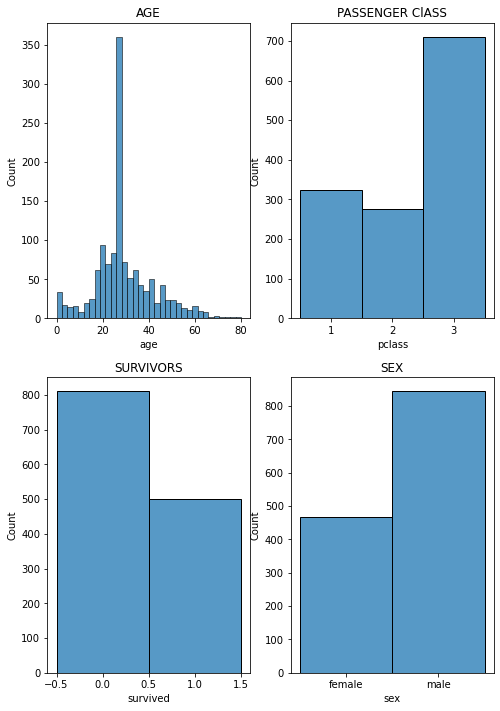

In [22]:
kde= False

fig = plt.figure(figsize=(8,25)) 
dim = (4, 2)
#AGE
plt.subplot2grid(dim, (0, 0))
sns.histplot(data= df.age, kde=kde)
plt.title('AGE')

# PLOTTING PASSENGER CLASS
plt.subplot2grid(dim, (0, 1))
sns.histplot(data= df.pclass, binwidth=3,kde=kde)
plt.title('PASSENGER ClASS')

# PLOTTING SURVIVED
plt.subplot2grid(dim, (1, 0))
sns.histplot(data= df.survived, kde=kde)
plt.title('SURVIVORS')


# PLOTTING SEX
plt.subplot2grid(dim, (1, 1))
sns.histplot(data= df.sex, kde=kde)
plt.title('SEX')




7. CONVERT ALL CATEGORICAL FEATURE INTO DUMMY VARIABLES

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1310 non-null   category
 1   sex       1310 non-null   category
 2   age       1310 non-null   int64   
 3   survived  1310 non-null   category
dtypes: category(3), int64(1)
memory usage: 14.6 KB


In [24]:
#USING PANDAS TO CONVERT CAT VAR TO DUMMY VARIABLES
df_dm = pd.get_dummies(df, columns=['sex','pclass'])
df_dm.head()

,age,survived,sex_female,sex_male,pclass_1.0,pclass_2.0,pclass_3.0
0,29,1.0,1,0,1,0,0
1,1,1.0,0,1,1,0,0
2,2,0.0,1,0,1,0,0
3,30,0.0,0,1,1,0,0
4,25,0.0,1,0,1,0,0


9. FIT TRAINING DATA TO A LOGISTIC REGRESSION MODEL.

In [25]:
#SPLIT THE THE DATA INTO TRAIN TEST SET
from sklearn.model_selection import train_test_split

X = X = df_dm.iloc[:, [0,2,3,4,5,6]].values
Y = df_dm['survived'].values
x_train,x_test, y_train, y_test = train_test_split(X,Y, random_state=101,train_size=0.3)

In [26]:
#CREATE A LOGISTIC REGRESSION MODEL.
from sklearn.linear_model import LogisticRegression

logist = LogisticRegression()
logist = logist.fit(x_train, y_train)


10. USING TEST TO GET ACCURACY

In [27]:
#PREDICTING ON OUR TEST DATASET
predictions = logist.predict(x_test)

In [28]:
#GETTING MODEL ACCURACY
score = logist.score(x_test,y_test)
print(score)

0.772082878953108


In [29]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.772082878953108
Precision: 0.69164265129683
Recall: 0.7017543859649122


11. PLOTTING CONFUSION MATRIX

[[468 107]
 [102 240]]


Text(0.5, 1.0, 'Confusion matrix \n Accuracy : 0.7721')

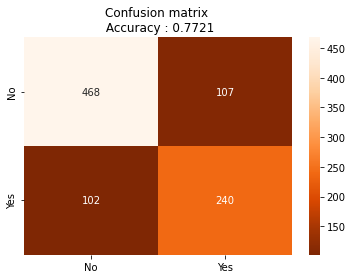

In [30]:
#USING SKLEARN TO PLOT CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

cnf_mat = confusion_matrix(y_test, predictions)

print(cnf_mat)

#PLOTTING THE VALUES.
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cnf_mat, 
    columns=['No','Yes'], index=['No','Yes']), annot=True, cmap="Oranges_r" ,fmt='g')
plt.title('Confusion matrix \n Accuracy : '+str(round(score,4)))

12. DISPLAYING PREDICTED  VALUE OF THE SURVIVABILITY OF [30.0,MALE,3RD CLASS]

In [33]:
#THE DATA MATRIX WILL FOLLOW
#age	survived	sex_female	sex_male	pclass_1.0	pclass_2.0	pclass_3.0

data = np.array([30.0, 0, 1, 0, 0, 1], ndmin=1)
data = data.reshape(1,-1)
predict = logist.predict(data.reshape(1,6))
print('WILL SURVIVE : ',"YES"if predict == 1 else "NO")

WILL SURVIVE :  NO
